# Img2Vec

Last week we saw how we can use a Word2Vec model to turn text into a vector of numbers, and how these numbers are a "finger-print" of the text. 

Funnily enough, a very similar task is possible with images, but requires a slighlty different toolkit - namely pre-trained deep learning image classification models.


# How does this work?

When building a Feed-Forward neural network to classify images, the consessus is that the first few layers (typically convolutional layers) act as a feature extraction & feature engineering process, and the final few layers (typically dense layers) act as the actual classifier that makes a decision based on the extracted features. 

One approach that has had some sucess is to take a pre-trained image classification model, chop-off the top few layers, and re-use the features extracted by the earlier layers to tackle a new problem without having to go through the volumes of data and tunning necessary to train the feature extraction layers.

Sadly, the features extracted are mostly black boxes, but at least we know that they can identify common objects with ~90% accuracy. 


# VGG19

The model I'll showcase here is VGG19, which performed excelently in the 2014 competition. 

> https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

Models have come a long way since then, but this remains a classic example.

Luckily, as with many other models, TensorFlow, and especially TensorFlow 2.0 make using this pre-trained model remarkably simple!

In [3]:
# All you need to do feature extraction on images:

# !pip install tensorflow==2.0.0-alpha0 


import numpy as np

from tensorflow.keras.applications.vgg19 import VGG19
import skimage

def format_image(img:np.array)->np.array:
    '''Converts the image into the format that is expected by the pre-trained model'''
    resized_img = skimage.transform.resize(img, (224, 224, 3), mode='reflect', anti_aliasing=True)
    formated_img = resized_img.reshape(1, *resized_img.shape)
    return formated_img

# Details at: https://keras.io/applications/#vgg19
model = VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

def extract_features(image:np.array, model=model)->np.array:
    formated_image = format_image(image)
    image_features = model.predict(formated_image).ravel()
    return image_features





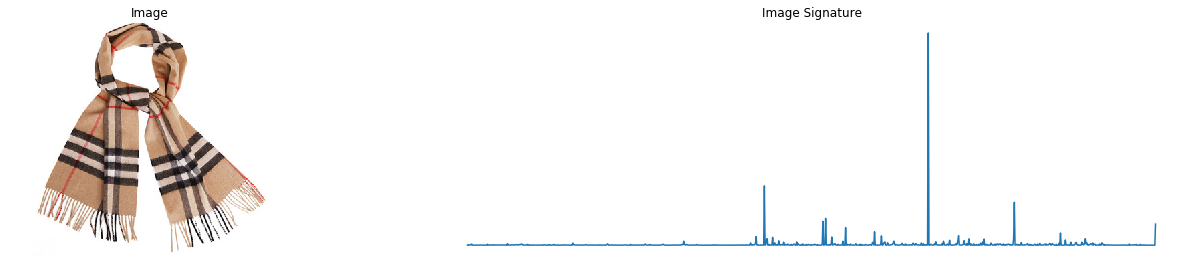

In [7]:
import matplotlib.pyplot as plt

def showcase_on(path_to_image:str)->np.array:
    img = plt.imread(path_to_image)
    image_features = extract_features(img)
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(20,4)

    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].plot(image_features)
    axes[1].set_title('Image Signature')

    for ax in axes:
        ax.set_axis_off()
        
    plt.tight_layout()

showcase_on('/Users/mkleinbort/Downloads/3929522.jpg')

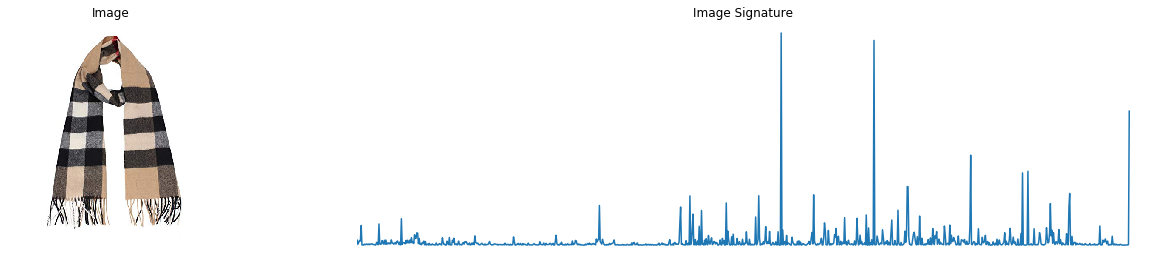

In [32]:
showcase('/Users/mkleinbort/Downloads/4031079.jpg')

# Building your own classifier

For this task you might want to us `tensorflow_datasets` as a library to download an image dataset

In [ ]:
# !pip install tensorflow-datasets

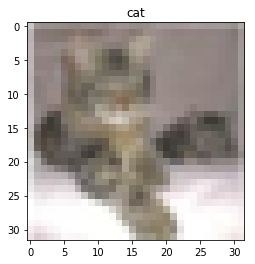

In [122]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset (will download the data)
dataset = tfds.load(name="cifar10", split=tfds.Split.TRAIN) # cifar10 is 160MB a dataset of images

class_dict = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'moose',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'boat',
    9: 'truck'}

for features in dataset.take(1):
    image, label = features["image"], class_dict[int(features["label"])]
    plt.imshow(image)
    plt.title(label)

# Using the pre trained model for feature extraction

Loading the label, and the features into a pandas dataframe

this takes some time, so feel free to simply load the data from the csv file that is prepared shortly after

In [168]:
data = pd.read_csv('image_data.csv')
data.head()

,target,x_000,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,...,x_990,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999
0,horse,0.000132,0.000268,0.000214,0.000218,0.001063,0.000166,0.000107,0.000321,0.000351,...,0.000034,0.000045,0.000132,0.000017,0.000112,0.000122,0.000124,0.000088,0.000204,0.026602
1,moose,0.000153,0.000283,0.000187,0.000242,0.001473,0.000170,0.000108,0.000322,0.000446,...,0.000040,0.000051,0.000139,0.000019,0.000118,0.000141,0.000135,0.000107,0.000233,0.022965
2,cat,0.000122,0.000252,0.000215,0.000211,0.000989,0.000169,0.000106,0.000331,0.000431,...,0.000032,0.000047,0.000135,0.000018,0.000099,0.000125,0.000118,0.000080,0.000213,0.027094
3,truck,0.000125,0.000188,0.000127,0.000192,0.001288,0.000134,0.000075,0.000281,0.000375,...,0.000029,0.000033,0.000111,0.000012,0.000076,0.000097,0.000106,0.000082,0.000219,0.025780
4,truck,0.000131,0.000251,0.000196,0.000216,0.001246,0.000151,0.000107,0.000307,0.000360,...,0.000039,0.000045,0.000132,0.000017,0.000105,0.000134,0.000127,0.000088,0.000229,0.021267
